#**Identificação da Aluna**

*   Nome: Andréa Lauro Ferreira
*   RNU: 5350897
*   Curso: Ciência de Dados


#**Exercício 1 - Manipulação de Dados e Gráfico**

Tema: Bibliotecas, gráficos, arquivos CSV

Nome da base de dados do exercício: salarios.xlsx

1 - Ler o arquivo salários

Para leitura do arquivo, o procedimento usado consistiu em:


1.   baixar o arquivo zipado arquivos-B2_2025 e descompactar
2.   No Google Colab, na aba à esquerda no menu, dei upload no arquivo para o exercício salarios.csv
3.   O arquivo salarios.csv aparece disponível para uso no ambiente de execução do Colab.




In [ ]:
import pandas as pd

# Leia o arquivo CSV, especificando vírgula como separador decimal e encoding latin1
df_salarios = pd.read_csv('/content/salarios.csv', decimal=',', encoding='latin1')

# Mostre as primeiras linhas do DataFrame
display(df_salarios.head())

,Cargo,Salario
0,Analista,4723.45
1,Gerente,13200.78
2,Estagiário,1450.00
3,Líder,8500.30
4,Analista,3890.10


Pontos importantes:

1.  primeiro passo = importar pandas as pd
2.  ler o arquivo CSV definindo o separador ","
3.  usar encoding Latin 1, pois o conteúdo possui acentos
4.  ler, então, o arquivo salarios.csv usando a função pd.read (da biblioteca pandas). O DataFrame estabelecido é exibido com a função display
5.  O DF só possui as informações de cargo e salário e cria, automaticamente, uma 1a coluna de numeração das linhas


2 - Criar gráfico de barras com Matplotlib ou Seaborn

Para criar o gráfico, foram executados os seguintes passos:

1.   importar biblioteca matplotlib como plt
2.   definir "average_salaries" e usar groupby e mean para calcular a média dos salários por cargo.
A função Groupby organiza os dados e a função mean é responsável por calcular a média
3.   usar plt.figure para exibir o gráfico com medidas (figsize) de 10 e 6.
4.   definir o tipo (kind) de gráfico como "bar" e a cor das colunas (color) como skyblue.
5.   adicionar na plotagem as labels x (Cargo), y (Média Salarial)
6.   adicionar título na plotagem (title)
7.   definir como rotação (rotation) e alinhamento horizontal (ha) como direita (right)
8.   por fim, usar plt.show para que o gráfico seja exibido



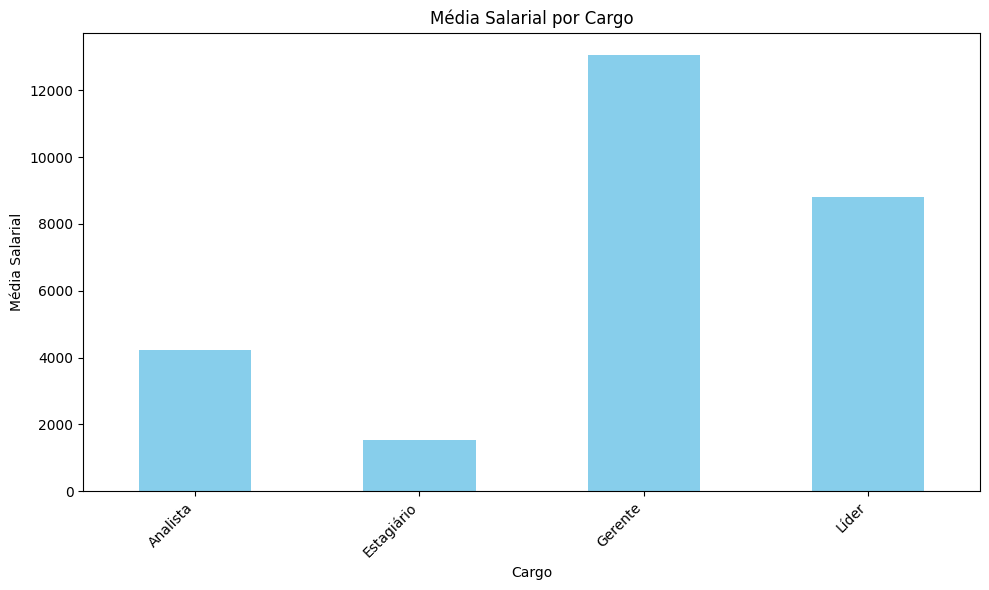

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas here as it's used for to_numeric

# Ensure 'Salario' column is numeric, coercing errors
df_salarios['Salario'] = pd.to_numeric(df_salarios['Salario'], errors='coerce')

# Calculate the average salary per position
average_salaries = df_salarios.groupby('Cargo')['Salario'].mean()

# Generate bar chart
plt.figure(figsize=(10, 6))
average_salaries.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Cargo')
plt.ylabel('Média Salarial')
plt.title('Média Salarial por Cargo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exiba o gráfico
plt.show()

3 - Salvar gráfico como imagem

Nesta etapa, do exercício 1, os passos são:

1.   salvar o plot (gráfico) como arquivo de imagem (PNG) - extensão PNG
2.   usar plt.savefig para que o gráfico seja salvo como imagem
3.   definir bbox_inches (tamanho do gráfico) como tight (área mínima necessária para exibir todos os elementos). Tight = apertado em português.



In [ ]:
# Salve o gráfico como arquivo de imagem (explo: PNG)
plt.savefig('media_salario_por_cargo.png', bbox_inches='tight')



<Figure size 640x480 with 0 Axes>

Ponto importante:

a) o gráfico PNG gerado estará no menu à esquerda do COLAB para ser baixado, se desejado.

# **Exercício 2 – Expressões Regulares e JSON**

Tema: Expressões regulares, arquivos JSON

Objetivo: Extrair e salvar dados estruturados.

Texto fornecido no exercício (abaixo)

texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"

1 - Usar Expressões Regulares para extrair nomes e e-mails

1.   primeiro, importar módulo "re" para as expressões regulares. Com isso, é possível usar regex
2.   usar re.findall para localizar ocorrências com mesmo padrão e retornar lista com as ocorrências encontradas. Uma é usada para nome, outra para e-mail
3.   Na re.findall para nomes, a ideia é encontrar todas as ocorrências de "Nome: ", capturar qualquer coisa que venha depois (não gananciosamente ou non-greedy) até a próxima vírgula, e armazenar essas capturas na lista nomes
4.   Idem para e-mails. No caso da re.findall para e-mails, a ideia é capturar o que vem depois (não gananciosamente ou non-greedy) até encontrar uma vírgula ou o final da string, e armazenar essas capturas na lista emails
5.  Ao final, imprimi (print) as listas criadas

In [ ]:
texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"



In [ ]:
import re

texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"

# Usar Regex para encontrar nomes depois de "Nome: "
nomes = re.findall(r"Nome: (.*?),", texto)

# Usar Regex para encontrar e-mails depois de "Email: "
emails = re.findall(r"Email: (.*?)(?:,|$)", texto)

#Imprimir as listas formadas
print("Nomes encontrados:", nomes)
print("E-mails encontrados:", emails)

Nomes encontrados: ['Ana', 'João']
E-mails encontrados: ['ana@email.com', 'joao@email.com']


2 - Salvar os dados em um arquivo JSON com a estrutura: 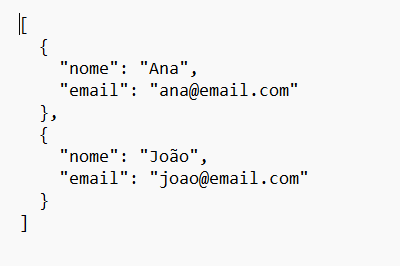

Passos a serem executados:

1.   importar json
2.   criar lista de dicionários com a estrutura estabelecida no exercício
3.   definir o nome do arquivo, no caso, dados_contato.json
4.   salvar os dados no formato json que aparecerá na aba à esquerda do menu do Colab



In [ ]:
import json

# Criar lista de dicionários com a estrutura desejada
dados_json = []
for nome, email in zip(nomes, emails):
    dados_json.append({"Nome": nome.strip(), "Email": email.strip()})

# Definir o nome do arquivo
nome_arquivo_json = 'dados_contato.json'

# Salvar em arquivo json
with open(nome_arquivo_json, 'w', encoding='utf-8') as f:
    json.dump(dados_json, f, indent=4, ensure_ascii=False)



# **Exercício 3 – Geradores, Otimização e Banco de Dados**

Tema: Geradores, SQLite, desempenho

Objetivo: Inserir dados em um banco de forma eficiente.


Para este exercício, foram seguidos os seguintes passos:

1.   Upload do arquivo lojas.xls para o ambiente de execução. O arquivo aparecerá à esquerda no menu do Colab
2.   Instalar openpyxl para ler arquivos xlsx
3.   Carregar os dados da planilha 'CLIENTE' de 'loja.xlsx' em um DataFrame do pandas. Ler com pd.read e exibir com display o DF criado (df_clientes)
4.   Analisar o arquivo 'loja.xlsx', especificamente a planilha "CLIENTE". Carregar esses dados em um banco de dados SQLite chamado "usuarios.db". Aqui, a ideia é estabelecer uma conexão com um banco de dados SQLite chamado 'usuarios.db'. Faz-se necessário importar sqlite como interface no Phyton. A variável é armazenada como objeto de conexão com o banco de dados usuarios.db
5.   Criar uma tabela no banco de dados 'usuarios.db' com colunas apropriadas para os dados da planilha 'CLIENTE'.
6.   Insirir os dados do DataFrame do pandas na tabela SQLite.
7.   Executar uma consulta SQL para selecionar todos os dados da tabela e exibir o resultado.
8.   Executar uma consulta SQL para selecionar todos os clientes cujo sexo é feminino e exiba o resultado.
9.   Salvar os resultados da consulta sobre clientes mulheres em um novo arquivo Excel

In [ ]:
%pip install openpyxl

In [ ]:
df_clientes = pd.read_excel('/content/loja.xlsx', sheet_name='CLIENTE')
display(df_clientes.head())

,Idcliente,Nome,Sobrenome,Sexo,Email
0,1,Deivison,Silva,m,deivisonsilva@hotmail.com
1,2,Shiryu,da Chuva,m,shiryu@cavaleirosdoszoodiacos.com
2,3,Carolina,Liz,f,carol_liz@hotmail.com
3,4,Drogo,Trones,m,drogogameoftrones@gmail.com
4,5,Malévola,Disney,f,malevola@disney.com


In [ ]:
import sqlite3

conn = sqlite3.connect('usuarios.db')

In [ ]:
cursor = conn.cursor()

create_table_sql = """
CREATE TABLE IF NOT EXISTS clientes (
    Idcliente INTEGER PRIMARY KEY,
    Nome TEXT,
    Sobrenome TEXT,
    Sexo TEXT,
    Email TEXT
);
"""

cursor.execute(create_table_sql)
conn.commit()
cursor.close()

In [ ]:
# Insira dados do DataFrame na tabela SQLite usando to_sql
# if_exists='replace' irá descartar a tabela e recriá-la com os novos dados
# index=False impede que os pandas gravem o índice DataFrame como uma coluna
df_clientes.to_sql('clientes', conn, if_exists='replace', index=False)

# Não há necessidade de commit explícito após to_sql com autocommit ou configurações padrão,
# mas é uma boa prática fechar a conexão ao terminar.
# Manter a conexão aberta para as próximas etapas da consulta, portanto, nada de conn.close() aqui ainda.

8

In [ ]:
cursor = conn.cursor()

cursor.execute("SELECT * FROM clientes")
all_clients = cursor.fetchall()

print("All client data:")
for client in all_clients:
    print(client)

cursor.close()

All client data:
(1, 'Deivison', 'Silva', 'm', 'deivisonsilva@hotmail.com')
(2, 'Shiryu', 'da Chuva', 'm', 'shiryu@cavaleirosdoszoodiacos.com')
(3, 'Carolina', 'Liz', 'f', 'carol_liz@hotmail.com')
(4, 'Drogo', 'Trones', 'm', 'drogogameoftrones@gmail.com')
(5, 'Malévola', 'Disney', 'f', 'malevola@disney.com')
(6, 'Guilherme', 'Patriota', 'm', 'guilherme@gmail.com')
(7, 'Marina', 'Santos', 'f', 'marina@pop.com.br')
(8, 'Deivison', 'Andrade', 'm', 'teste@teste.com.br')


In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM clientes WHERE Sexo = 'f'")
female_clients = cursor.fetchall()

print("\nFemale client data:")
for client in female_clients:
    print(client)

cursor.close()


Female client data:
(3, 'Carolina', 'Liz', 'f', 'carol_liz@hotmail.com')
(5, 'Malévola', 'Disney', 'f', 'malevola@disney.com')
(7, 'Marina', 'Santos', 'f', 'marina@pop.com.br')


In [ ]:
# Cria um DataFrame de pandas a partir da lista de clientes femininas
df_female_clients = pd.DataFrame(female_clients, columns=['Idcliente', 'Nome', 'Sobrenome', 'Sexo', 'Email'])

# Salva o DataFrame em um novo arquivo Excel
df_female_clients.to_excel('female_clients.xlsx', index=False)